In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# !pip install tensorflow-gpu==2.0.0-rc1
!pip install 'h5py==2.10.0' --force-reinstall

ERROR: Invalid requirement: "'h5py==2.10.0'": Expected package name at the start of dependency specifier
    'h5py==2.10.0'
    ^


In [2]:
import numpy as np

rows = np.loadtxt("./lotto.csv", delimiter=",")
row_count = len(rows)
print(row_count)

537


In [5]:
import numpy as np


def numbers2ohbin(numbers):

    ohbin = np.zeros(45) #45개의 빈 칸을 만듬

    for i in range(6): #여섯개의 당첨번호에 대해서 반복함
        ohbin[int(numbers[i])-1] = 1 #로또번호가 1부터 시작하지만 벡터의 인덱스 시작은 0부터 시작하므로 1을 뺌
    
    return ohbin

#원핫인코딩으로 변환
def ohbin2numbers(ohbin):

    numbers = []
    
    for i in range(len(ohbin)):
        if ohbin[i] == 1.0: # 1.0으로 설정되어 있으면 해당 번호를 반환값에 추가한다.
            numbers.append(i+1)
    
    return numbers

In [6]:
numbers = rows[:, 1:7]
ohbins = list(map(numbers2ohbin, numbers))

x_samples = ohbins[0:row_count-1]
y_samples = ohbins[1:row_count]

#원핫인코딩으로 표시
print("ohbins")
print("X[0]: " + str(x_samples[0]))
print("Y[0]: " + str(y_samples[0]))

#번호로 표시
print("numbers")
print("X[0]: " + str(ohbin2numbers(x_samples[0])))
print("Y[0]: " + str(ohbin2numbers(y_samples[0])))

ohbins
X[0]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Y[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
numbers
X[0]: [2, 16, 19, 31, 34, 35]
Y[0]: [13, 14, 22, 27, 30, 38]


In [7]:
print(tf.__version__)

NameError: name 'tf' is not defined

In [8]:
train_idx = (0, 400) #훈련
val_idx = (401, 500) #검증
test_idx = (501, len(x_samples)) #시험

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

# 모델을 정의합니다.
model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 매 에포크마다 훈련과 검증의 손실 및 정확도를 기록하기 위한 변수
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# 최대 100번 에포크까지 수행
for epoch in range(100):

    model.reset_states()

    batch_train_loss = []
    batch_train_acc = []
    
    for i in range(train_idx[0], train_idx[1]):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(val_idx[0], val_idx[1]):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys) #배치만큼 모델에 입력하여 나온 답을 정답과 비교함
        
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))

epoch    0 train acc 0.025 loss 0.418 val acc 0.040 loss 0.399
epoch    1 train acc 0.037 loss 0.398 val acc 0.040 loss 0.398
epoch    2 train acc 0.043 loss 0.394 val acc 0.040 loss 0.398
epoch    3 train acc 0.037 loss 0.392 val acc 0.040 loss 0.398
epoch    4 train acc 0.037 loss 0.388 val acc 0.030 loss 0.399
epoch    5 train acc 0.035 loss 0.383 val acc 0.010 loss 0.401
epoch    6 train acc 0.045 loss 0.376 val acc 0.020 loss 0.404
epoch    7 train acc 0.043 loss 0.369 val acc 0.020 loss 0.408
epoch    8 train acc 0.048 loss 0.360 val acc 0.020 loss 0.413
epoch    9 train acc 0.060 loss 0.352 val acc 0.020 loss 0.418
epoch   10 train acc 0.068 loss 0.344 val acc 0.010 loss 0.423
epoch   11 train acc 0.072 loss 0.335 val acc 0.010 loss 0.427
epoch   12 train acc 0.090 loss 0.327 val acc 0.020 loss 0.432
epoch   13 train acc 0.087 loss 0.318 val acc 0.020 loss 0.436
epoch   14 train acc 0.095 loss 0.309 val acc 0.010 loss 0.442
epoch   15 train acc 0.115 loss 0.299 val acc 0.010 los

In [27]:

pip install matplotlib

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.5 MB 4.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.1/7.5 MB 5.9 MB/s eta 0:00:01
   ------------------- -------------------- 3.7/7.5 MB 6.4 MB/s eta 0:00:01
   ---------------------- ----------------- 4.2/7.5 MB 5.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.0/7.5 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------- ----------- 1.8/2.6 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


NameError: name 'train_loss' is not defined

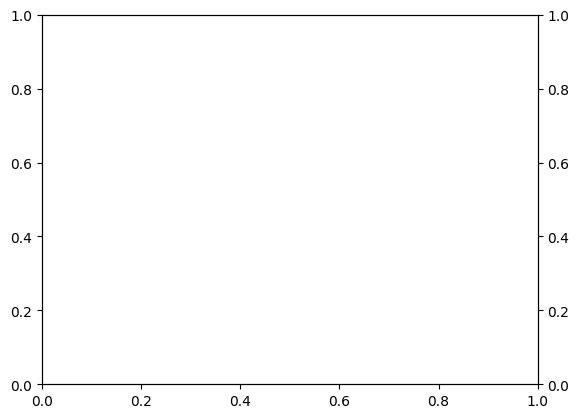

In [10]:
# 그래프로 성능 확인(딥러닝을 학습한다고 해서 검증값은 잘 나오지 않는걸 알 수 있음.)
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [29]:
# 88회부터 지금까지 1등부터 5등까지 상금의 평균낸다.
mean_prize = [ np.mean(rows[87:, 8]),
           np.mean(rows[87:, 9]),
           np.mean(rows[87:, 10]),
           np.mean(rows[87:, 11]),
           np.mean(rows[87:, 12])]

print(mean_prize)  

[2372092029.1044445, 56777152.11777778, 1457124.5777777778, 50000.0, 5000.0]


In [30]:
# 등수와 상금을 반환함
# 순위에 오르지 못한 경우에는 등수가 0으로 반환함
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return 0, mean_prize[0]
    elif count == 5 and true_bonus in pred_numbers:
        return 1, mean_prize[1]
    elif count == 5:
        return 2, mean_prize[2]
    elif count == 4:
        return 3, mean_prize[3]
    elif count == 3:
        return 4, mean_prize[4]

    return 5, 0

In [31]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [32]:
train_total_reward = []
train_total_grade = np.zeros(6, dtype=int)

val_total_reward = []
val_total_grade = np.zeros(6, dtype=int)

test_total_reward = []
test_total_grade = np.zeros(6, dtype=int)

model.reset_states()

print('[No. ] 1st 2nd 3rd 4th 5th 6th Rewards')

for i in range(len(x_samples)):
    xs = x_samples[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs) # 모델의 출력값을 얻음
    
    sum_reward = 0
    sum_grade = np.zeros(6, dtype=int) # 6등까지 변수

    for n in range(10): # 10판 수행
        numbers = gen_numbers_from_probability(ys_pred[0])
        
        #i회차 입력 후 나온 출력을 i+1회차와 비교함
        grade, reward = calc_reward(rows[i+1,1:7], rows[i+1,7], numbers) 
        
        sum_reward += reward
        sum_grade[grade] += 1

        if i >= train_idx[0] and i < train_idx[1]:
            train_total_grade[grade] += 1
        elif i >= val_idx[0] and i < val_idx[1]:
            val_total_grade[grade] += 1
        elif i >= test_idx[0] and i < test_idx[1]:
            val_total_grade[grade] += 1
    
    if i >= train_idx[0] and i < train_idx[1]:
        train_total_reward.append(sum_reward)
    elif i >= val_idx[0] and i < val_idx[1]:
        val_total_reward.append(sum_reward)
    elif i >= test_idx[0] and i < test_idx[1]:
        test_total_reward.append(sum_reward)
                        
    print('[{0:4d}] {1:3d} {2:3d} {3:3d} {4:3d} {5:3d} {6:3d} {7:15,d}'.format(i+1, sum_grade[0], sum_grade[1], sum_grade[2], sum_grade[3], sum_grade[4], sum_grade[5], int(sum_reward)))

print('Total') 
print('==========')    
print('Train {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(train_total_grade[0], train_total_grade[1], train_total_grade[2], train_total_grade[3], train_total_grade[4], train_total_grade[5], int(sum(train_total_reward))))
print('Val   {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(val_total_grade[0], val_total_grade[1], val_total_grade[2], val_total_grade[3], val_total_grade[4], val_total_grade[5], int(sum(val_total_reward))))
print('Test  {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(test_total_grade[0], test_total_grade[1], test_total_grade[2], test_total_grade[3], test_total_grade[4], test_total_grade[5], int(sum(test_total_reward))))
print('==========')    

[No. ] 1st 2nd 3rd 4th 5th 6th Rewards
[   1]   4   0   5   1   0   0   9,495,703,739
[   2]   5   0   4   1   0   0  11,866,338,643
[   3]   5   0   1   4   0   0  11,862,117,270
[   4]   1   0   2   7   0   0   2,375,356,278
[   5]   3   0   3   4   0   0   7,120,847,461
[   6]   3   0   4   3   0   0   7,122,254,585
[   7]   4   0   4   2   0   0   9,494,296,614
[   8]   1   0   7   2   0   0   2,382,391,901
[   9]   3   0   3   3   1   0   7,120,802,461
[  10]   5   0   4   1   0   0  11,866,338,643
[  11]   4   0   5   1   0   0   9,495,703,739
[  12]   2   1   2   4   0   1   4,804,075,459
[  13]   4   0   5   1   0   0   9,495,703,739
[  14]   0   0   6   3   1   0       8,897,747
[  15]   2   2   4   2   0   0   4,863,666,860
[  16]   2   0   5   2   1   0   4,751,574,681
[  17]   5   0   4   1   0   0  11,866,338,643
[  18]   4   1   5   0   0   0   9,552,430,891
[  19]   4   0   5   0   1   0   9,495,658,739
[  20]   1   0   5   3   1   0   2,379,532,651
[  21]   5   0   5   

In [12]:
#검증셋 없이 모든 데이터를 다시 훈련시킨다.
# 최대 100번 에포크까지 수행
for epoch in range(100):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    for i in range(len(x_samples)):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss)))


In [33]:
# 마지막 회차까지 학습한 모델로 다음 회차 추론

print('receive numbers')

xs = x_samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(10):
    numbers = gen_numbers_from_probability(ys_pred[0])
    numbers.sort()
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)

receive numbers
0 : [1, 6, 16, 23, 37, 39]
1 : [6, 13, 29, 37, 39, 43]
2 : [6, 16, 23, 29, 37, 39]
3 : [5, 6, 16, 23, 37, 39]
4 : [6, 11, 16, 23, 37, 39]
5 : [13, 16, 23, 37, 42, 43]
6 : [6, 12, 21, 23, 29, 37]
7 : [1, 6, 16, 29, 37, 39]
8 : [6, 16, 23, 29, 37, 39]
9 : [6, 19, 23, 29, 37, 44]
